## Feature Engineering for Assignment 3 and 4

**Note:** This code only covers the feature engineering and data splitting part, and not model training and feature selection. I have selected a few sample features, which may not represent the ideal set of features. 

You may wish to use this code in Assignment 4 but I recommend you use your code from Assignment 3 first, especially if you came up with your own feature combinations and your feature engineering code ran successfully. 

In [26]:
# Fixing issues with printing out the dataframes using head() method
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Loading the data into a dataFrame
mt_rainier_df = pd.read_csv('MtRainier_data.csv')

# Dropping duplicated data, if any
mt_rainier_df = mt_rainier_df.drop_duplicates()

# Dropping any rows with null/NaN values
mt_rainier_df = mt_rainier_df.dropna()


mt_rainier_df.head()

,Unnamed: 0,Date,Route,Succeeded,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,0,11/27/2015,Disappointment Cleaver,0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,1,11/21/2015,Disappointment Cleaver,0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,2,10/15/2015,Disappointment Cleaver,0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,3,10/13/2015,Little Tahoma,0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,4,10/9/2015,Disappointment Cleaver,0,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292


From this, we select the following colums as features:

- **'Route'** - The rationale behind selecting the column as a feature is that given the weather/climatic conditions on a given day, one route may be preferrable over others. A user may want to maximize the chances of sumitting given any route. 
- **'Temperature AVG'**: Temperature being too high or low may have adverse impact on the body and hence may reduce the chances of summitting. This is why we select this column as a feature. 
- **'Relative Humidity AVG'**: Selected for simlar reasons as Temperature AVG. 
- **'Wind Speed Daily AVG'**: Wind-speed being high or low has an impact on the ease of climbing, and hence chances of sumitting, hence selected as feature. 
- **'Wind Direction AVG'**: Wind direction change may have an adverse impact on climbing, and hence could be related to sumitting. We select this as a feature. 
- **'Solare Radiation AVG**: For the same reason as Wind Direction AVG. 

We select the following column as label:
- **Succeeded** which carries a binary value for chances of sumitting (1- for success and 0- for no sucess)

In [27]:
features_df = mt_rainier_df[['Route', 'Temperature AVG', 'Relative Humidity AVG', 'Wind Speed Daily AVG', 'Wind Direction AVG', 'Solare Radiation AVG']]
features_df.head()

,Route,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,Disappointment Cleaver,26.321667,19.715000,27.839583,68.004167,88.496250
1,Disappointment Cleaver,31.300000,21.690708,2.245833,117.549667,93.660417
2,Disappointment Cleaver,46.447917,27.211250,17.163625,259.121375,138.387000
3,Little Tahoma,40.979583,28.335708,19.591167,279.779167,176.382667
4,Disappointment Cleaver,38.260417,74.329167,65.138333,264.687500,27.791292


In [28]:
labels_df = mt_rainier_df[['Succeeded']]
labels_df.head()

,Succeeded
0,0
1,0
2,0
3,0
4,0


From our features, we observe that "Route" is a categorical nominal feature. It would need 1-hot transformation

In [29]:
route_encoder = OneHotEncoder()

route_list = features_df['Route'].to_list()
route_list_of_list = [[el] for el in route_list]

route_transformed = route_encoder.fit_transform(route_list_of_list)
route_transformed = route_transformed.toarray()

route_transformed_df = pd.DataFrame(route_transformed)
print(f'Route 1-hot shape is {route_transformed_df.shape}')

Route 1-hot shape is (1895, 22)


In [30]:
features_df.reset_index(drop=True, inplace=True)
route_transformed_df.reset_index(drop=True, inplace=True)

# Concatinating the Route dataframe + the features dataframe 
features_transformed_df = pd.concat([features_df, route_transformed_df], axis=1)

# Dropping the original Route column
features_transformed_df = features_transformed_df.drop(columns=["Route"], axis=1)

# Printing out the new shape after the 1-hot encoding has been finished and original column dropped
print(f"Shape of data after droping original categorical column = {features_transformed_df.shape}")

Shape of data after droping original categorical column = (1895, 27)


We now scale the numerical features except route using MinMax Scaler

In [31]:
# Creating the scaler 
scaler = MinMaxScaler()

# Scaleing the numerical features with standard scaler
numerical_feature_names = ['Temperature AVG', 
                   'Relative Humidity AVG', 
                   'Wind Speed Daily AVG', 
                   'Wind Direction AVG', 
                   'Solare Radiation AVG']
features_transformed_df[numerical_feature_names] = scaler.fit_transform(features_transformed_df[numerical_feature_names])

# Printing out the head of the feature-engineered dataframe
features_transformed_df.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,21
0,0.395119,0.083886,0.427392,0.204255,0.240442,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.496061,0.106431,0.034478,0.389892,0.254473,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.803203,0.169424,0.263495,0.920335,0.375994,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.692326,0.182255,0.300762,0.997736,0.479228,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.637191,0.707076,1.000000,0.941191,0.075508,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We form the train-test split. The train split can be used for cross validation

In [32]:
# Putting the features and labels into a numpy array for sklearn's data splitter
features = features_transformed_df.to_numpy()
labels = labels_df.to_numpy()

# Splitting the data into test and training data
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=512)

print (f"Shape of features for train+validation data= {_x.shape}")
print (f"Shape of labels for train+validation data= {_y.shape}")
print (f"Shape of features for test data = {x_test.shape}")
print (f"Shape of features for test data = {y_test.shape}")

Shape of features for train+validation data= (1705, 27)
Shape of labels for train+validation data= (1705, 1)
Shape of features for test data = (190, 27)
Shape of features for test data = (190, 1)


- Carla Gonzalez
- Mon Feb 27 2023
- i320D: Applied Machine Learning on Python

## Assignment 4: Decision Tree and Ensemble methods

### Define and initialize classifiers:
#### 1. Logistic Regression
#### 2. SVC
#### 3. Decision Tree
#### 4. Random Forest Classifier
#### 5. Gradient Boosting Classifier

I will import the models I will use and then initialize them:

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier


lr_vanilla = LogisticRegression(penalty="none") 
svm_linear = SVC(kernel="linear")
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=23) 
grad_boost = GradientBoostingClassifier()
voting = VotingClassifier(estimators=[("1",lr_vanilla),("2",svm_linear),("3",dt)])

all_models = {"lr":lr_vanilla, 
              "svm":svm_linear,
              "decision_tree":dt,
              "random_forest":rf,
              "grad_boost":grad_boost,
              "voting":voting}

print (f"We are working with classifiers {all_models.keys()}")

We are working with classifiers dict_keys(['lr', 'svm', 'decision_tree', 'random_forest', 'grad_boost', 'voting'])


And now we get the mean cross validation accuracy from each model to use the one with the higher accuracy:

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

features = features_transformed_df.to_numpy()
labels = labels_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 5

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

/Users/carlagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carlagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Mean cross validation accuracy for model lr = 0.6146627565982404
Mean cross validation accuracy for model svm = 0.6082111436950146
Mean cross validation accuracy for model decision_tree = 0.6052785923753665
Mean cross validation accuracy for model random_forest = 0.6211143695014663
Mean cross validation accuracy for model grad_boost = 0.6304985337243402


/Users/carlagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carlagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Mean cross validation accuracy for model voting = 0.6234604105571847
Best model is grad_boost with 5-fold accuracy of 0.6304985337243402


Testing accuracy for best model, in this case gradient boosting classifier:

In [95]:
from sklearn.metrics import accuracy_score

best_model.fit(_x,_y.flatten())

y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test, y_test.flatten())

print (f"Test accuracy for model {test_accuracy}")

GradientBoostingClassifier()

Test accuracy for model 0.6157894736842106


### Feature Ranking: Ablation Test 

In [96]:
best_model = GradientBoostingClassifier()
feature_names = features_transformed_df.columns[0:5]

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    
    # Remmeber? We have the train + valid data in the above section?
    # We just remove the feature by not selecting the column from the index i

    x_ablated = np.delete(_x,i,axis=1) # axis = 1 means columns
    
    cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy = {average_cv_score}")
    accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score
    

Removing feature Temperature AVG
Mean cross validation accuracy = 0.632258064516129
Removing feature Relative Humidity AVG
Mean cross validation accuracy = 0.6263929618768328
Removing feature Wind Speed Daily AVG
Mean cross validation accuracy = 0.6275659824046921
Removing feature Wind Direction AVG
Mean cross validation accuracy = 0.6287390029325512
Removing feature Solare Radiation AVG
Mean cross validation accuracy = 0.619941348973607


### Plotting accuracies after ablation test

<BarContainer object of 6 artists>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

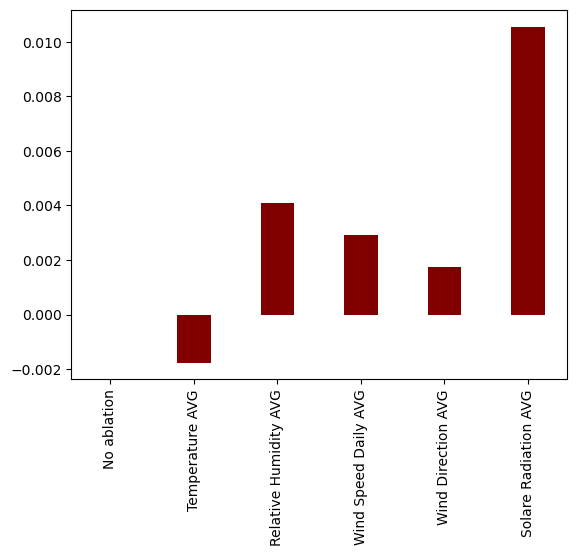

In [97]:
from matplotlib import pyplot as plt

plt.bar(accuracy_drop_log.keys(), accuracy_drop_log.values(), color="maroon", width = 0.4)
plt.xticks(rotation="vertical")

In [98]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1


Features are ranked from best to worst (based on how removing them impacts the accuracy of grad_boost)
**************************************
Feature 1.Solare Radiation AVG, drop in acc 0.010557184750733195
Feature 2.Relative Humidity AVG, drop in acc 0.004105571847507372
Feature 3.Wind Speed Daily AVG, drop in acc 0.0029325513196480912
Feature 4.Wind Direction AVG, drop in acc 0.0017595307917889214
Feature 5.Temperature AVG, drop in acc -0.0017595307917888103


Looking at the feature ranking list, after the ablation test, led to the conclusion that the feature with most impact on the model is solare radiation, followed by wind speed daily and relative humidity. 